# Data Analytics Assignment 1

Imports

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Extracting data

In [2]:
# get pandas from csv

def read_csv(filename):
    return pd.read_csv(filename)

df = read_csv('../dataset.csv')
df

/tmp/ipykernel_224681/2896704280.py:4: DtypeWarning: Columns (39) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv(filename)


,ID,Possession Status,Availability Starts From,Floor No,Commercial,Developer,Approved Authority Name,Units Available,Price,Price (English),...,Rentable CommuniPfty Space,Retail Boulevard (Retail Shops),Cycling & Jogging Track,Fire Fighting Equipment,Aesthetically designed landscape garden,Possession By,NRI Pref,Land Area / Covered Area,Land Area Unit,Pantry Type
0,12685,Under Construction,Dec '25,5,N,NaN,KDMC,1.0,3150000.0,31.5 Lac,...,1,1,1,1,1,NaN,NaN,NaN,NaN,NaN
1,12684,Ready to Move,NaN,20,Y,TATA Housing Development Company Ltd.,TMC,10.0,6300000.0,63 Lac,...,1,1,1,1,1,NaN,NaN,NaN,NaN,NaN
2,12683,Ready to Move,NaN,18,N,Sai Satyam Developers,KDMC,0.0,5400000.0,54 Lac,...,1,1,1,1,1,NaN,Y,NaN,NaN,NaN
3,12682,Under Construction,Dec '25,5,N,Birla Estates,KDMC,70.0,9000000.0,90 Lac,...,1,1,1,1,1,NaN,NaN,NaN,NaN,NaN
4,12681,Under Construction,Dec '24,8,Y,Godrej Properties,NaN,NaN,4950000.0,49.5 Lac,...,1,1,1,1,1,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12680,5,Dec '26,Dec '26,NaN,Y,Kalpataru Ltd.,NaN,NaN,22200000.0,2.22 Cr,...,0,0,0,0,0,Dec '26,NaN,NaN,NaN,NaN
12681,4,Under Construction,Mar '26,10,N,Kalpataru Ltd.,MCGM,20.0,31000000.0,3.10 Cr,...,1,1,1,1,1,NaN,NaN,NaN,NaN,NaN
12682,3,Under Construction,Mar '26,5,N,Kalpataru Ltd.,MMRDA,7.0,18500000.0,1.85 Cr,...,1,1,1,1,1,NaN,NaN,NaN,NaN,NaN
12683,2,Ready to Move,NaN,1,Y,NaN,MCGM,0.0,22000000.0,2.20 Cr,...,1,1,1,1,1,NaN,NaN,NaN,NaN,NaN


Cleaning data

In [3]:
# remove the records with missing values



In [4]:
df.iloc[:,39]

0           635
1           579
2           850
3          1050
4           561
          ...  
12680       NaN
12681    1376.0
12682     970.0
12683       NaN
12684     685.0
Name: Covered Area.1, Length: 12685, dtype: object

### Task 1

As investors have diverse budget limits, split the overall opportunities into three different price ranges. Analyze the distribution of these price ranges across cities.

In [5]:
# divide into three price ranges

# Calculate percentiles
low_threshold = df['Price'].quantile(0.33)
medium_threshold = df['Price'].quantile(0.66)

# Define price ranges using percentiles
bins = [0, low_threshold, medium_threshold, df['Price'].max()]
labels = ['Low', 'Medium', 'High']

price_range = pd.cut(df['Price'], bins=bins, labels=labels, include_lowest=True)
# price_range

grouped_data=df.groupby(['City',price_range]).size().unstack()
grouped_data

/tmp/ipykernel_224681/3048910809.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data=df.groupby(['City',price_range]).size().unstack()


Price,Low,Medium,High
City,,,
Agartala,1,0,0
Bhiwandi,2,0,0
Gurgaon,1,0,0
Hyderabad,8,0,0
Kalyan,7,2,0
Mumbai,2041,2599,3855
Nagpur,5,2,0
Palghar,2,0,0
Thane,2101,1556,419


Stacked Bar Graph

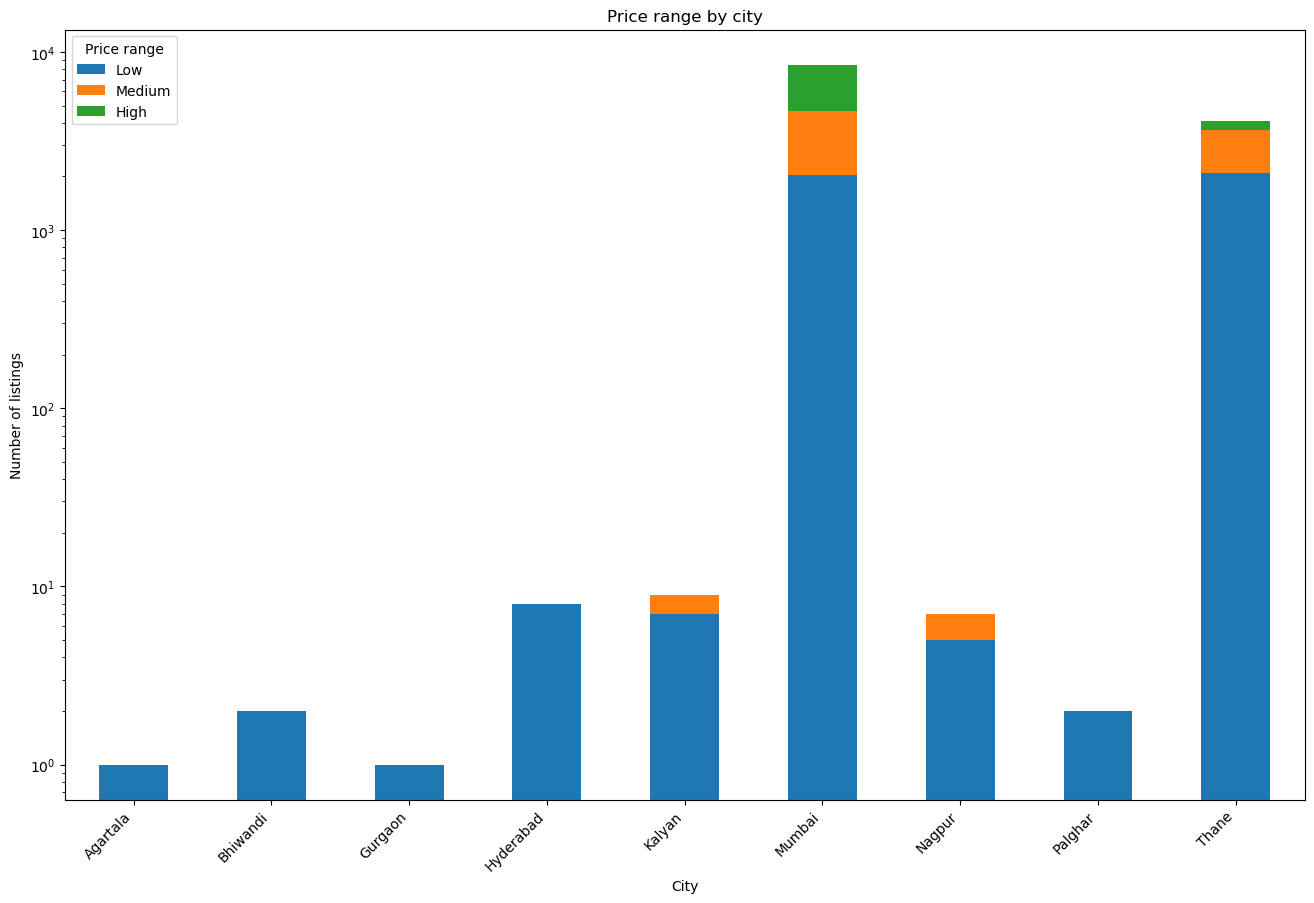

In [6]:
grouped_data.plot(kind='bar', stacked=True, figsize=(16, 10))
plt.title('Price range by city')
# taking log scale to make the graph more readable
plt.yscale('log')
plt.xlabel('City')
plt.ylabel('Number of listings')
plt.legend(title='Price range')
plt.xticks(rotation=45, ha='right')
plt.show()


Box Plot

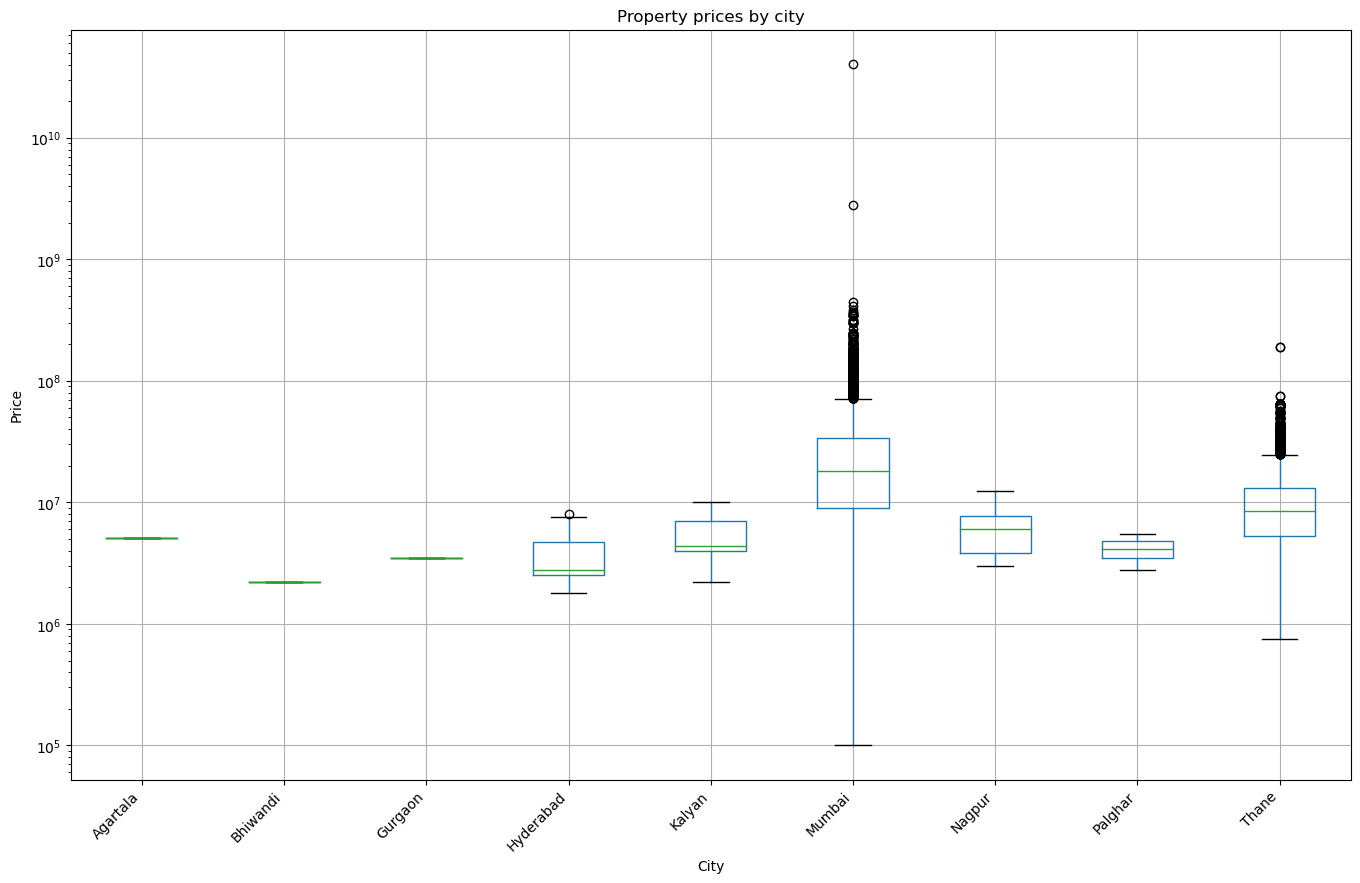

In [7]:
df.boxplot(column='Price', by='City', figsize=(16, 10))
plt.title('Property prices by city')
plt.suptitle('')
plt.xlabel('City')
plt.ylabel('Price')
plt.yscale('log')
plt.xticks(rotation=45, ha='right')
plt.show()


/tmp/ipykernel_224681/3689687052.py:2: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(x='City', y='Price', data=df, scale='width', inner='quartile')


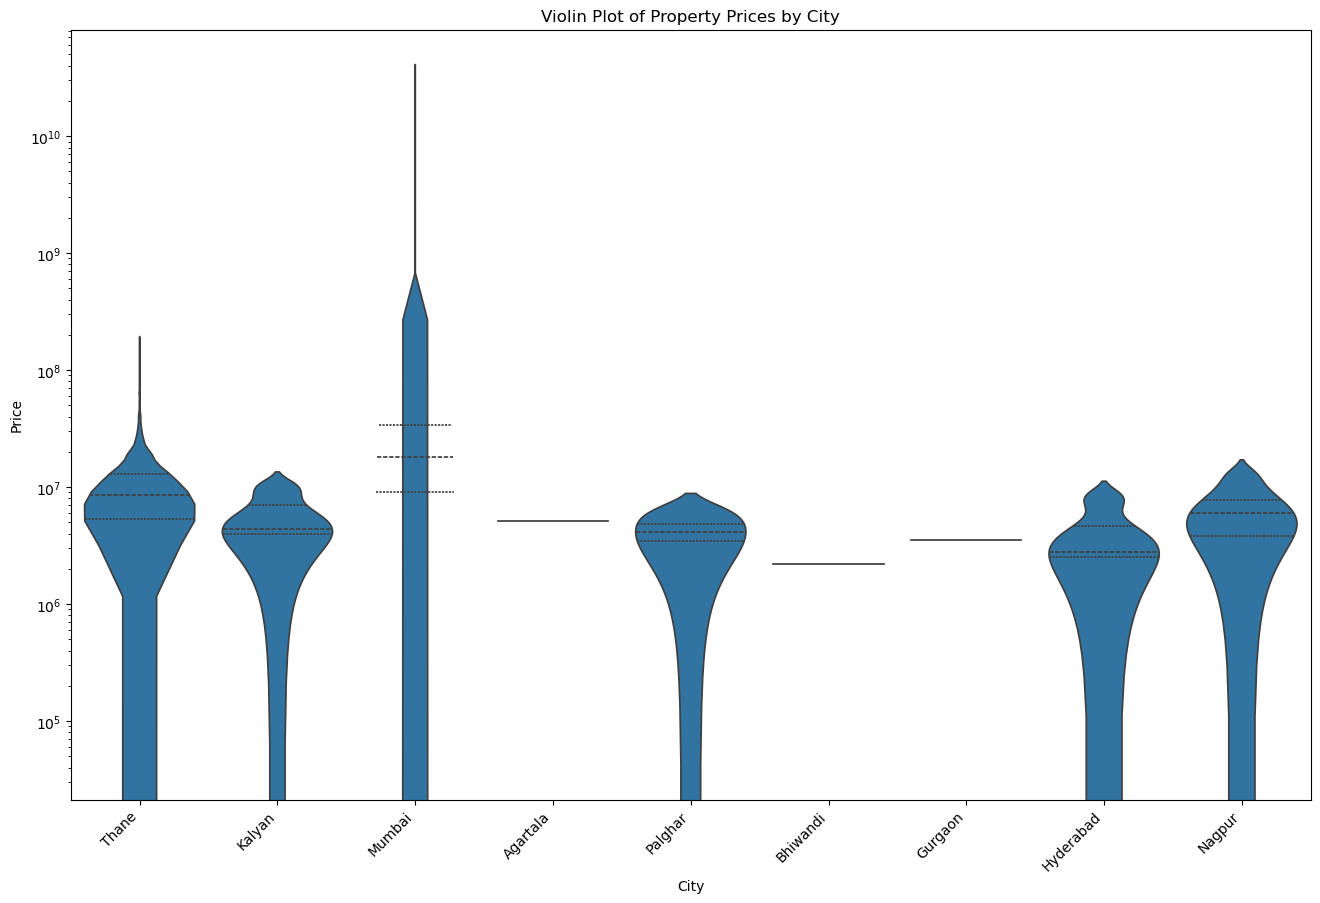

In [8]:
plt.figure(figsize=(16, 10))
sns.violinplot(x='City', y='Price', data=df, scale='width', inner='quartile')
plt.title('Violin Plot of Property Prices by City')
plt.xlabel('City')
plt.ylabel('Price')
plt.xticks(rotation=45, ha='right')
plt.yscale('log')  # Log scale if needed
plt.show()


In [9]:
df

,ID,Possession Status,Availability Starts From,Floor No,Commercial,Developer,Approved Authority Name,Units Available,Price,Price (English),...,Rentable CommuniPfty Space,Retail Boulevard (Retail Shops),Cycling & Jogging Track,Fire Fighting Equipment,Aesthetically designed landscape garden,Possession By,NRI Pref,Land Area / Covered Area,Land Area Unit,Pantry Type
0,12685,Under Construction,Dec '25,5,N,NaN,KDMC,1.0,3150000.0,31.5 Lac,...,1,1,1,1,1,NaN,NaN,NaN,NaN,NaN
1,12684,Ready to Move,NaN,20,Y,TATA Housing Development Company Ltd.,TMC,10.0,6300000.0,63 Lac,...,1,1,1,1,1,NaN,NaN,NaN,NaN,NaN
2,12683,Ready to Move,NaN,18,N,Sai Satyam Developers,KDMC,0.0,5400000.0,54 Lac,...,1,1,1,1,1,NaN,Y,NaN,NaN,NaN
3,12682,Under Construction,Dec '25,5,N,Birla Estates,KDMC,70.0,9000000.0,90 Lac,...,1,1,1,1,1,NaN,NaN,NaN,NaN,NaN
4,12681,Under Construction,Dec '24,8,Y,Godrej Properties,NaN,NaN,4950000.0,49.5 Lac,...,1,1,1,1,1,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12680,5,Dec '26,Dec '26,NaN,Y,Kalpataru Ltd.,NaN,NaN,22200000.0,2.22 Cr,...,0,0,0,0,0,Dec '26,NaN,NaN,NaN,NaN
12681,4,Under Construction,Mar '26,10,N,Kalpataru Ltd.,MCGM,20.0,31000000.0,3.10 Cr,...,1,1,1,1,1,NaN,NaN,NaN,NaN,NaN
12682,3,Under Construction,Mar '26,5,N,Kalpataru Ltd.,MMRDA,7.0,18500000.0,1.85 Cr,...,1,1,1,1,1,NaN,NaN,NaN,NaN,NaN
12683,2,Ready to Move,NaN,1,Y,NaN,MCGM,0.0,22000000.0,2.20 Cr,...,1,1,1,1,1,NaN,NaN,NaN,NaN,NaN


### Task 2

Provide investors with a high-level summary of the whole data using the price range dimensions. Consider factors like Type of Property, city, and key amenities. What method/tool would you use to present this information effectively?

In [10]:
type(price_range)

pandas.core.series.Series

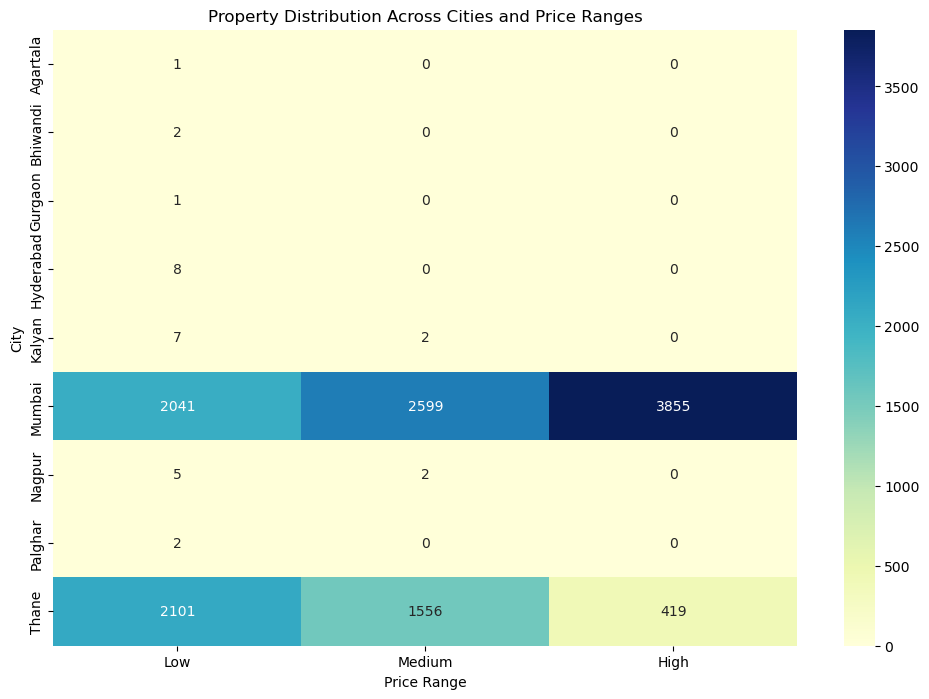

In [11]:
# Create a pivot table to aggregate the count of properties by city and price range
price_range_city = pd.crosstab(df['City'],price_range)

plt.figure(figsize=(12, 8))
sns.heatmap(price_range_city, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Property Distribution Across Cities and Price Ranges')
plt.xlabel('Price Range')
plt.ylabel('City')
plt.show()

In [12]:
# add a new column to the dataframe with the price range

df['Price Range'] = price_range
df['Amenities Facing']

0                   Garden/Park, Pool
1                           Main Road
2              Garden/Park, Main Road
3        Pool, Garden/Park, Main Road
4                         Garden/Park
                     ...             
12680                             NaN
12681    Garden/Park, Pool, Main Road
12682                     Garden/Park
12683                       Main Road
12684                       Main Road
Name: Amenities Facing, Length: 12685, dtype: object

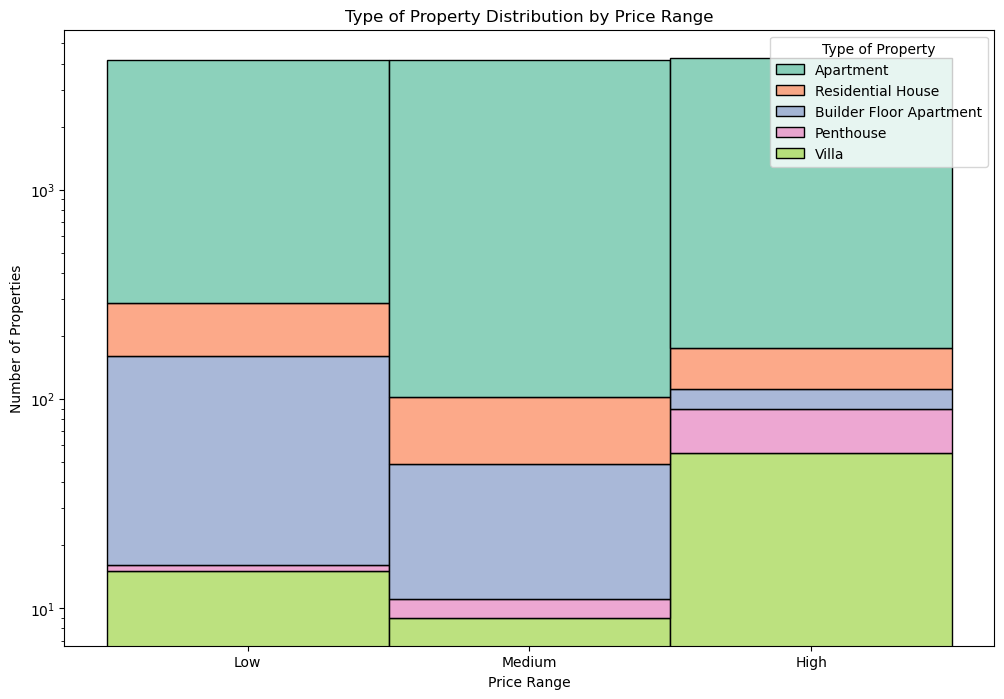

In [13]:
plt.figure(figsize=(12, 8))
sns.histplot(data=df, x='Price Range', hue='Type of Property', multiple='stack', palette='Set2')
plt.title('Type of Property Distribution by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Number of Properties')
plt.yscale('log')
plt.show()

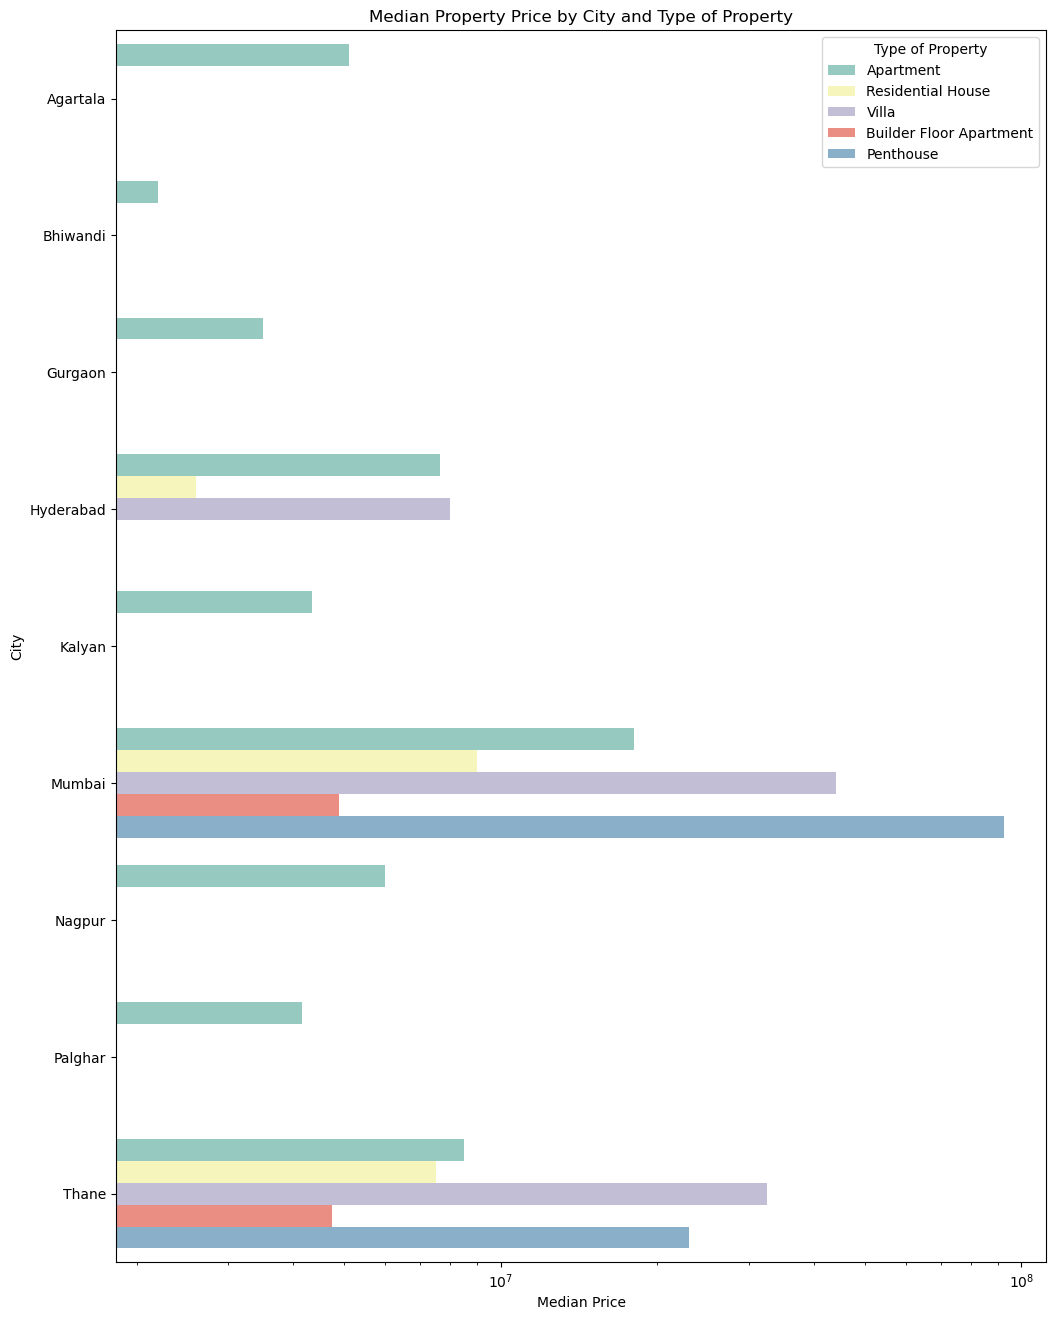

In [14]:
# Calculate median prices
median_price_by_city_type = df.groupby(['City', 'Type of Property'])['Price'].median().reset_index()

plt.figure(figsize=(12, 16))
sns.barplot(x='Price', y='City', hue='Type of Property', data=median_price_by_city_type, palette='Set3')
plt.title('Median Property Price by City and Type of Property')
plt.xlabel('Median Price')
plt.ylabel('City')
plt.xscale('log')  # Log scale for a better view of price ranges
plt.show()

(amenities left)

(summary left)

In [15]:

from tabulate import tabulate

# Summary statistics for the expanded summary table
summary_stats = {
    'Metric': [
        'Average Price',
        'Median Price',
        'Price Range Spread',
        'Standard Deviation of Prices',
        'City with Highest Median Price',
        'City with Lowest Median Price',
        'City with Most Listings',
        'Most Common Type of Property',
        'Type of Property with Highest Average Price',
        'Type of Property with Lowest Average Price',
        'Percentage of Properties with Gymnasium',
        'Percentage of Properties with Swimming Pool',
        'Properties with Both Gymnasium and Swimming Pool',
        'Top 3 Cities for Affordable Investments',
        'Top 3 Cities for Luxury Investments',
        'Cities with the Most Diverse Price Ranges',
        # 'Number of New Listings (Last Month)',
        # 'Fastest Selling City'
    ],
    'Value': [
        df['Price'].mean(),
        df['Price'].median(),
        df['Price'].max() - df['Price'].min(),
        df['Price'].std(),
        df.groupby('City')['Price'].median().idxmax(),
        df.groupby('City')['Price'].median().idxmin(),
        df['City'].value_counts().idxmax(),
        df['Type of Property'].mode()[0],
        df.groupby('Type of Property')['Price'].mean().idxmax(),
        df.groupby('Type of Property')['Price'].mean().idxmin(),
        f"{df['Gymnasium'].mean() * 100:.2f}%",
        f"{df['Swimming Pool'].mean() * 100:.2f}%",
        ((df['Gymnasium'] == 1) & (df['Swimming Pool'] == 1)).sum(),
        ', '.join(df[df['Price Range'] == 'Low']['City'].value_counts().nlargest(3).index),
        ', '.join(df[df['Price Range'] == 'High']['City'].value_counts().nlargest(3).index),
        ', '.join(df.groupby('City')['Price Range'].nunique().nlargest(3).index),
        # df[df['Date Listed'] > '2024-07-01'].shape[0],  # Example date
        # df.groupby('City')['Days on Market'].mean().idxmin()
    ]
}

# Create the table
table = tabulate(summary_stats, headers='keys', tablefmt='fancy_grid')

# Print the table
print(table)


╒══════════════════════════════════════════════════╤══════════════════════════╕
│ Metric                                           │ Value                    │
╞══════════════════════════════════════════════════╪══════════════════════════╡
│ Average Price                                    │ 26402614.49019919        │
├──────────────────────────────────────────────────┼──────────────────────────┤
│ Median Price                                     │ 13500000.0               │
├──────────────────────────────────────────────────┼──────────────────────────┤
│ Price Range Spread                               │ 40799900001.0            │
├──────────────────────────────────────────────────┼──────────────────────────┤
│ Standard Deviation of Prices                     │ 365364830.89608055       │
├──────────────────────────────────────────────────┼──────────────────────────┤
│ City with Highest Median Price                   │ Mumbai                   │
├───────────────────────────────────────

In [16]:

# import plotly.express as px

# # Assuming amenities columns are binary (0 or 1), sum the values for each price range and Type of Property
# amenities_data = df.groupby(['Price Range', 'Type of Property']).sum().reset_index()

# fig = px.scatter(amenities_data, x='Price Range', y='Type of Property',
#                  size='Swimming Pool', color='Gymnasium', hover_name='Type of Property',
#                  size_max=60, title='Key Amenities Availability by Price Range and Type of Property')
# fig.show(renderer='png')


### Task 3

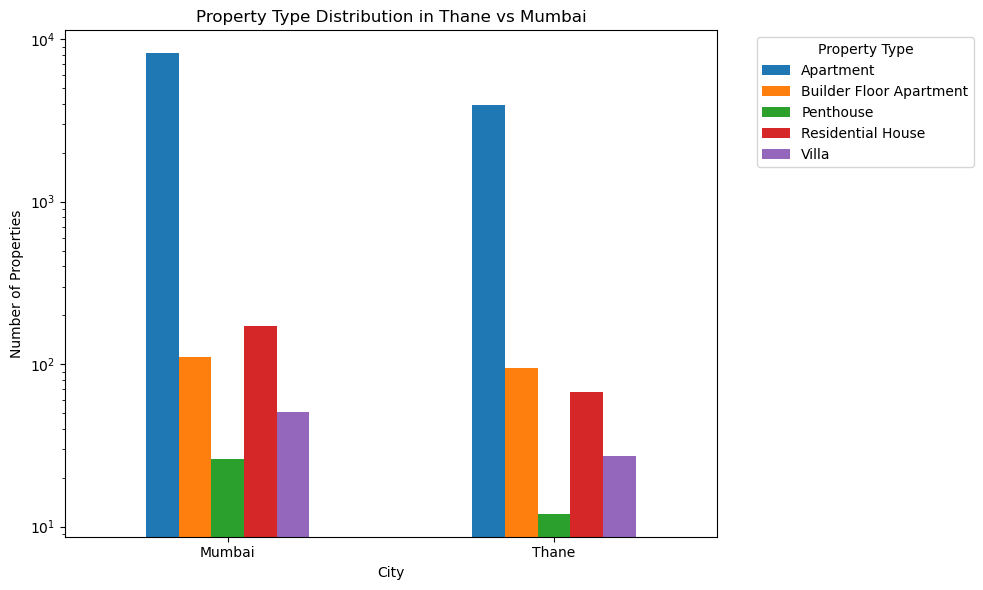

In [17]:
# Filter data for Thane and Mumbai
thane_mumbai_data = df[df['City'].isin(['Thane', 'Mumbai'])]

# 1. Property Type Distribution
property_type_dist = thane_mumbai_data.groupby(['City', 'Type of Property']).size().unstack()

# Plotting Property Type Distribution as a Grouped Bar Graph
property_type_dist.plot(kind='bar', stacked=False, figsize=(10, 6))  # Set stacked=False for grouped bar graph
plt.title('Property Type Distribution in Thane vs Mumbai')
plt.ylabel('Number of Properties')
plt.yscale('log')  # Log scale for better visualization
plt.xlabel('City')
plt.grid(False)
plt.xticks(rotation=0)
plt.legend(title='Property Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


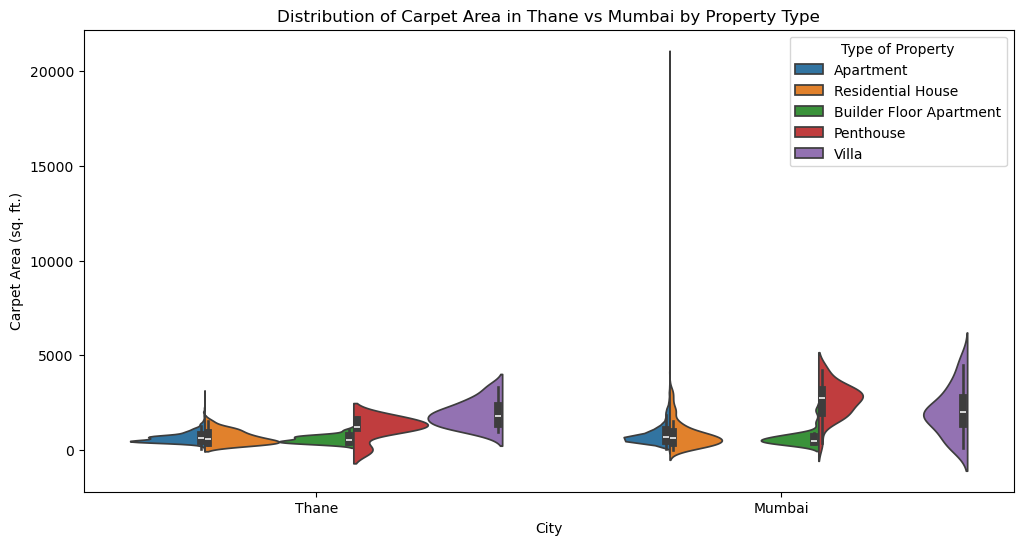

In [18]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='City', y='Carpet Area', hue='Type of Property', data=thane_mumbai_data, split=True)
plt.title('Distribution of Carpet Area in Thane vs Mumbai by Property Type')
plt.ylabel('Carpet Area (sq. ft.)')
# plt.yscale('log')
plt.xlabel('City')
plt.show()

/tmp/ipykernel_224681/103792279.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  thane_mumbai_data['Price per Sq Ft'] = thane_mumbai_data['Price'] / thane_mumbai_data['Carpet Area']


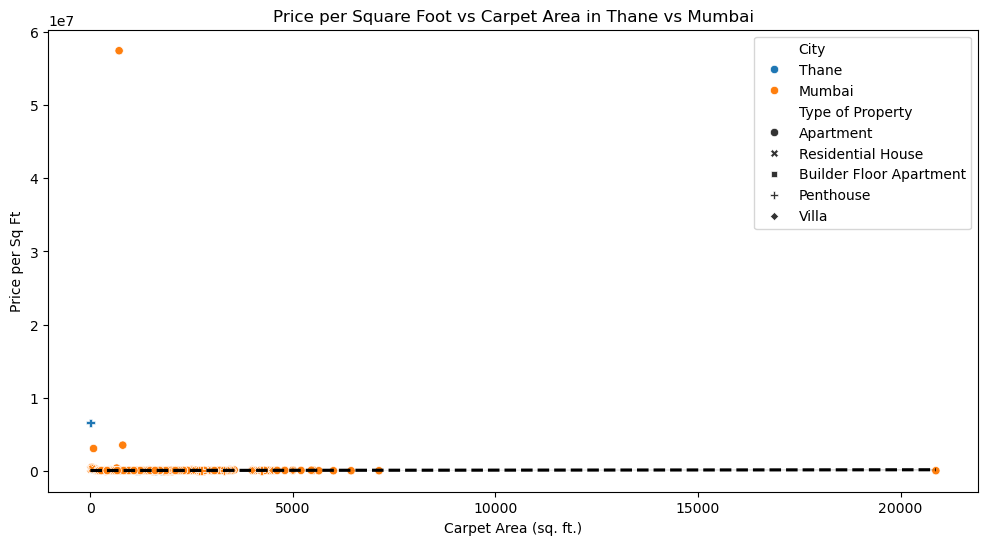

In [19]:
# 4. Price per Square Foot Analysis: Scatter Plot with Regression Line
thane_mumbai_data['Price per Sq Ft'] = thane_mumbai_data['Price'] / thane_mumbai_data['Carpet Area']
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Carpet Area', y='Price per Sq Ft', hue='City', style='Type of Property', data=thane_mumbai_data)
sns.regplot(x='Carpet Area', y='Price per Sq Ft', data=thane_mumbai_data, scatter=False, color='black', line_kws={"linestyle":"--"})
plt.title('Price per Square Foot vs Carpet Area in Thane vs Mumbai')
plt.ylabel('Price per Sq Ft')
plt.xlabel('Carpet Area (sq. ft.)')
plt.show()

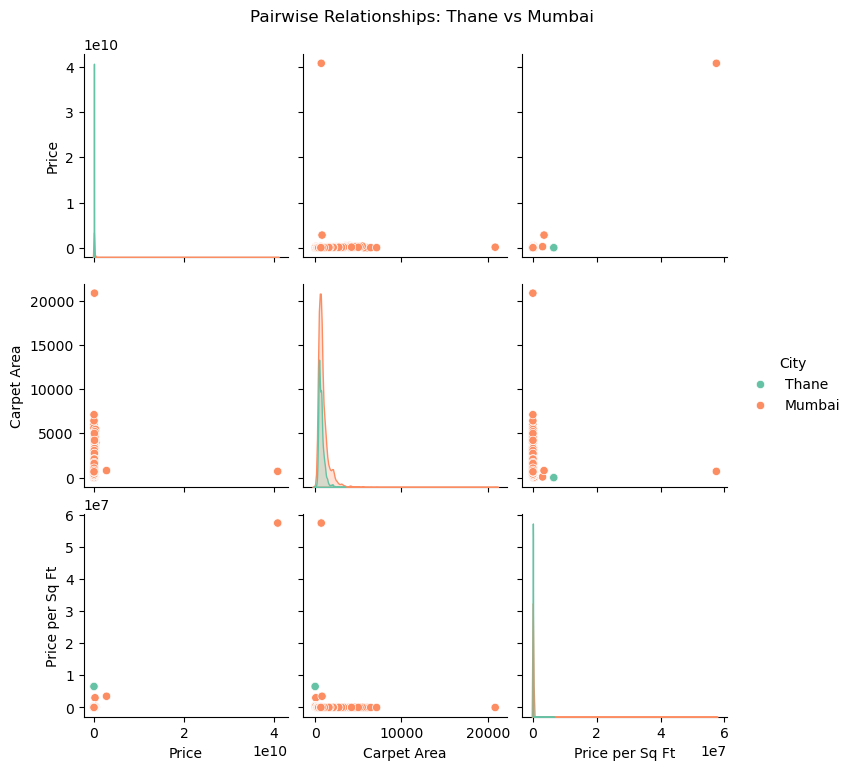

In [20]:
# 5. Correlation Analysis: Pair Plot
pairplot_data = thane_mumbai_data[['Price', 'Carpet Area', 'Price per Sq Ft', 'City']]
sns.pairplot(pairplot_data, hue='City', palette='Set2')
plt.suptitle('Pairwise Relationships: Thane vs Mumbai', y=1.02)
plt.show()

### Task 4

(within each city???)

<Figure size 1200x600 with 0 Axes>

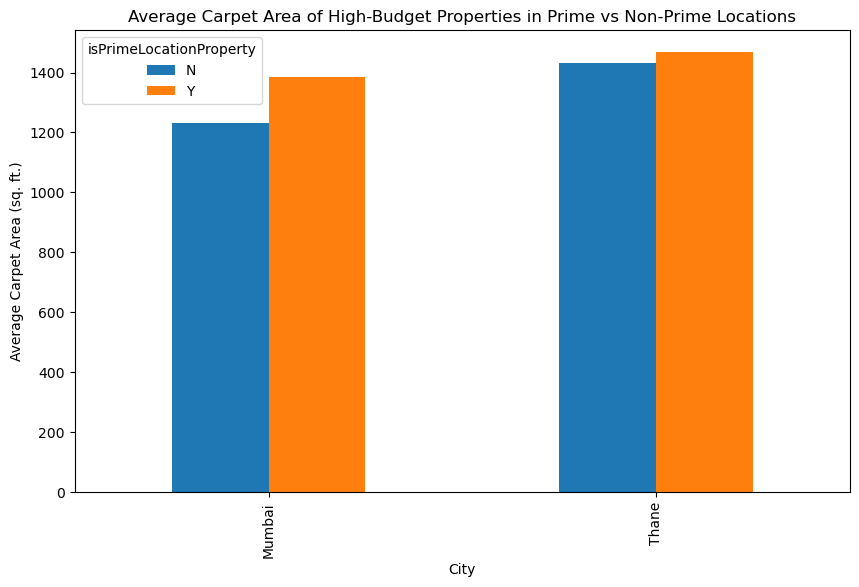

In [21]:

# Step 1: Filter data for high-budget properties
high_budget_threshold = df['Price'].quantile(0.75)  # Consider top 25% as high-budget properties
high_budget_data = df[df['Price'] >= high_budget_threshold]

# Step 2: Group data by Prime vs Non-Prime Locations
prime_vs_non_prime = high_budget_data.groupby(['City', 'isPrimeLocationProperty'])['Carpet Area'].mean().unstack()

# Step 3: Visualization
plt.figure(figsize=(12, 6))

# Bar Plot
prime_vs_non_prime.plot(kind='bar', figsize=(10, 6))
plt.title('Average Carpet Area of High-Budget Properties in Prime vs Non-Prime Locations')
plt.ylabel('Average Carpet Area (sq. ft.)')
plt.xlabel('City')
plt.show()


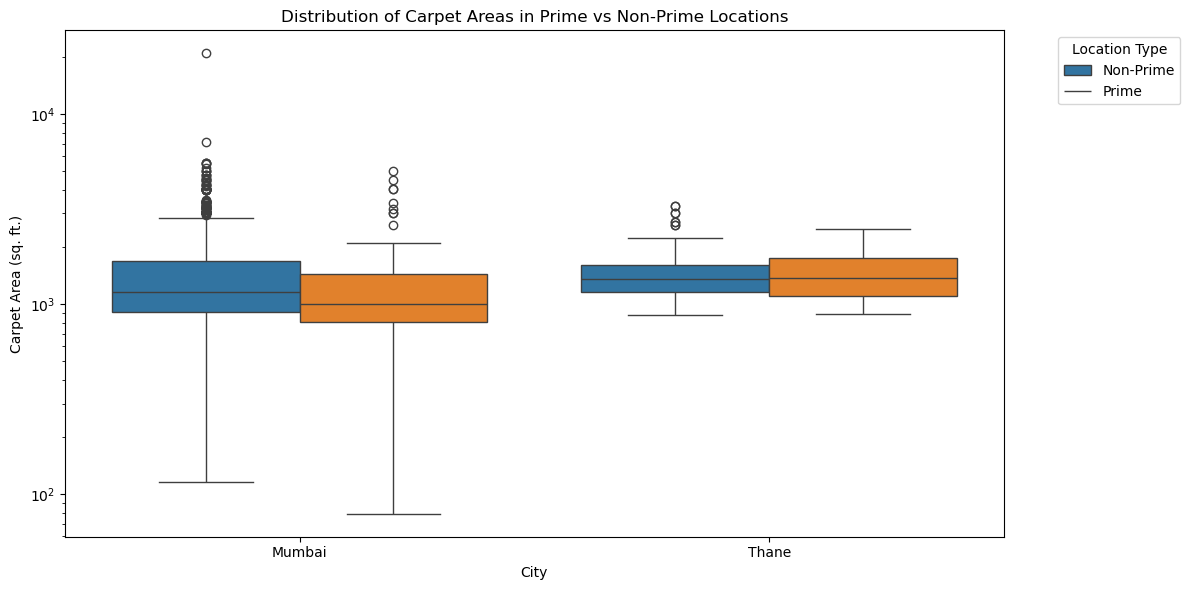

In [22]:
# Box Plot: Distribution of Carpet Areas in Prime vs Non-Prime Locations
plt.figure(figsize=(12, 6))
sns.boxplot(x='City', y='Carpet Area', hue='isPrimeLocationProperty', data=high_budget_data)
plt.title('Distribution of Carpet Areas in Prime vs Non-Prime Locations')
plt.ylabel('Carpet Area (sq. ft.)')
plt.xlabel('City')
plt.xticks(rotation=0)
plt.yscale('log')
plt.legend(title='Location Type', labels=['Non-Prime', 'Prime'], bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Task 5

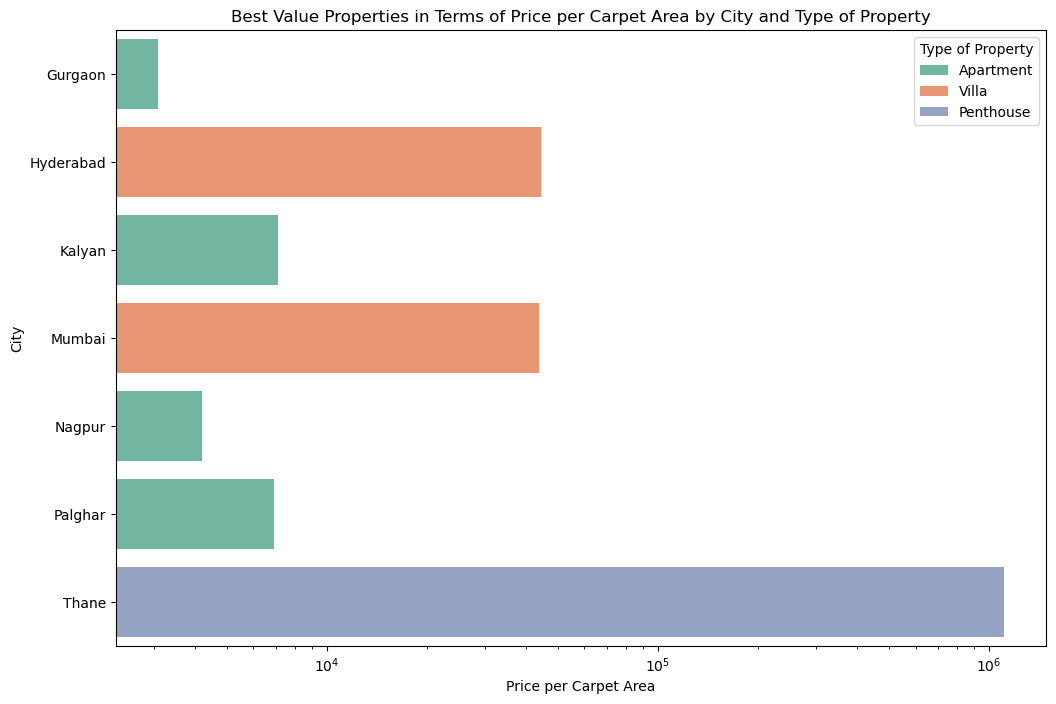

In [46]:
# Identify and visualize properties that offer the best value in terms of Carpet Area per unit of Price across different cities

# make a copy of the dataframe
df_copy = df.copy()

# drop all rows with NA carpet area
df_copy.dropna(subset=['Carpet Area'], inplace=True)

# Calculate Carpet Area per unit of Price
df_copy['Price per Carpet Area'] = df_copy['Price'] / df_copy['Carpet Area'] 

# Group data by City and Type of Property
city_property_group = df_copy.groupby(['City', 'Type of Property'])['Price per Carpet Area'].mean().reset_index()

# Find the property with the best value in terms of Carpet Area per unit of Price for each City
best_value_properties = city_property_group.loc[city_property_group.groupby('City')['Price per Carpet Area'].idxmax()]

# Plotting the best value properties
plt.figure(figsize=(12, 8))
sns.barplot(x='Price per Carpet Area', y='City', hue='Type of Property', data=best_value_properties, palette='Set2')
plt.title('Best Value Properties in Terms of Price per Carpet Area by City and Type of Property')
plt.xlabel('Price per Carpet Area')
plt.xscale('log')
plt.ylabel('City')
plt.show()

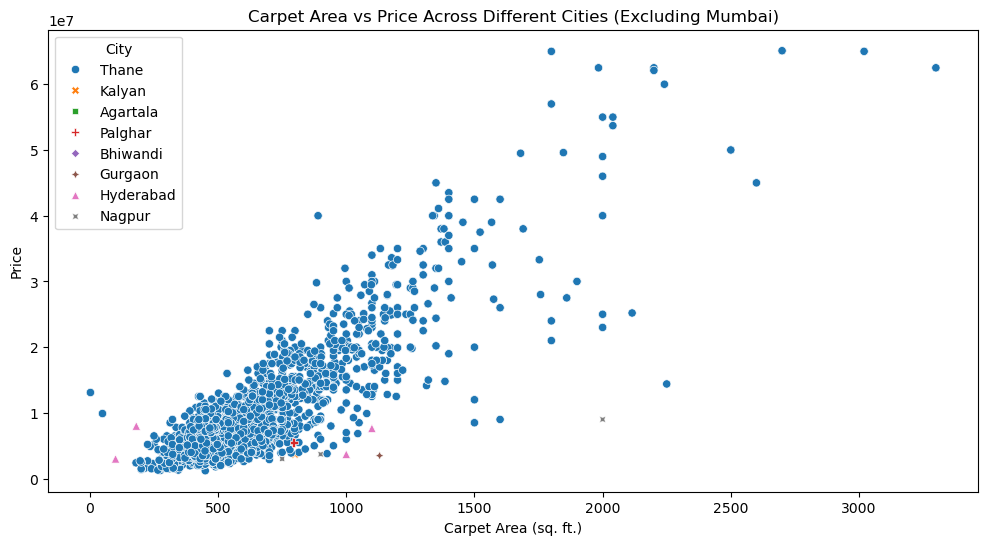

In [47]:
# carpet area vs price across different cities except mumbai

# Filter data for cities excluding Mumbai
df_other_cities = df[df['City'] != 'Mumbai']
# df_other_cities = df[~df['City'].isin(['Mumbai', 'Thane'])]


# Scatter Plot: Carpet Area vs Price Across Different Cities

plt.figure(figsize=(12, 6))
sns.scatterplot(x='Carpet Area', y='Price', hue='City', style='City', data=df_other_cities)
# sns.scatterplot(x='Carpet Area', y='Price', hue='City', style='City', data=df)
plt.title('Carpet Area vs Price Across Different Cities (Excluding Mumbai)')
plt.ylabel('Price')
plt.xlabel('Carpet Area (sq. ft.)')
plt.show()

### Task 6

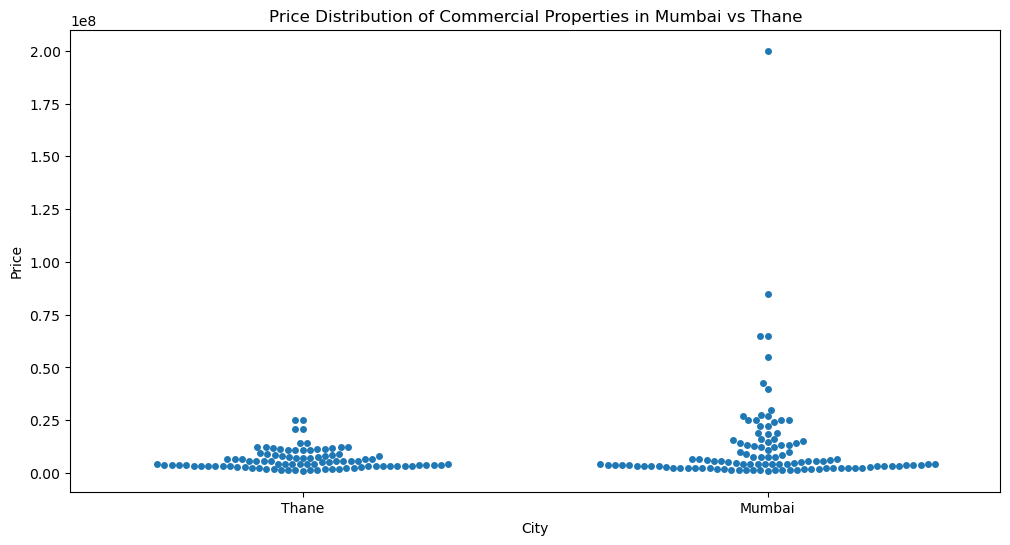

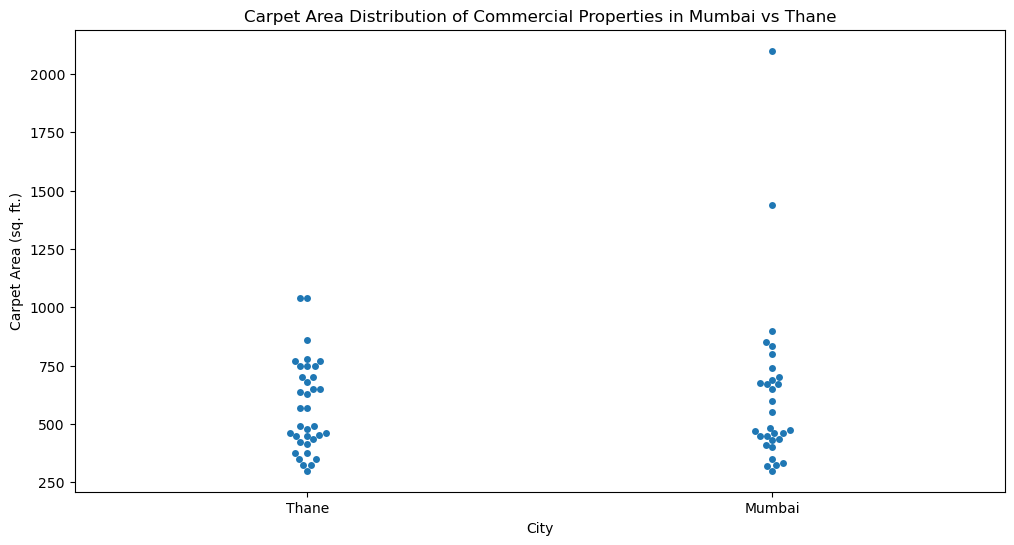

In [23]:
# Analyze commercial properties in Mumbai and Thane, considering factors like Price, Carpet Area, Amenities, and location

# Filter data for commercial properties in Mumbai and Thane
commercial_data = df[(df['City'].isin(['Mumbai', 'Thane'])) & (df['Type of Property'] == 'Builder Floor Apartment')]
commercial_data

# 1. Price Distribution of Commercial Properties in Mumbai vs Thane
plt.figure(figsize=(12, 6))
sns.swarmplot(x='City', y='Price', data=commercial_data)
plt.title('Price Distribution of Commercial Properties in Mumbai vs Thane')
plt.ylabel('Price')
plt.xlabel('City')
plt.show()

plt.figure(figsize=(12, 6))
sns.swarmplot(x='City', y='Carpet Area', data=commercial_data)
plt.title('Carpet Area Distribution of Commercial Properties in Mumbai vs Thane')
plt.ylabel('Carpet Area (sq. ft.)')
plt.xlabel('City')
plt.show()


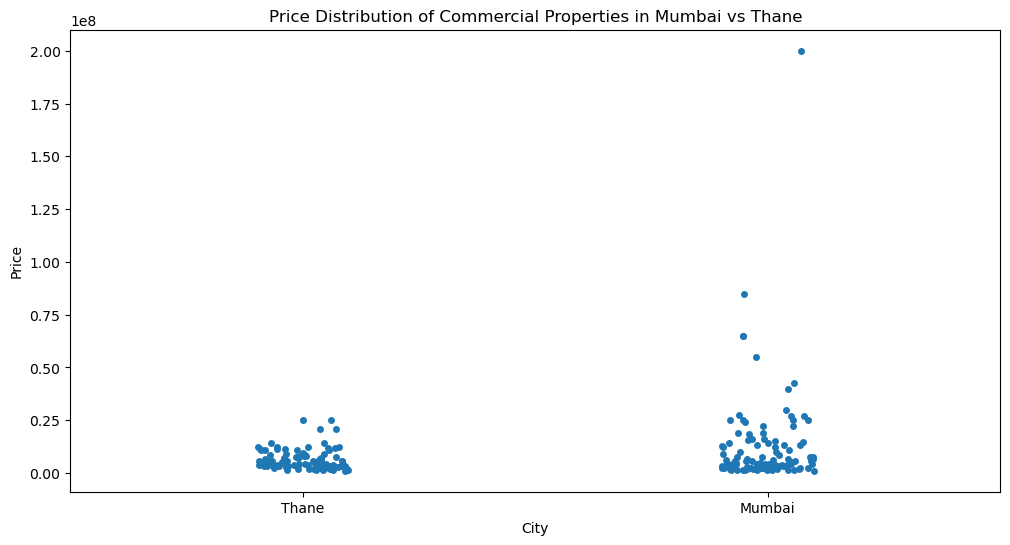

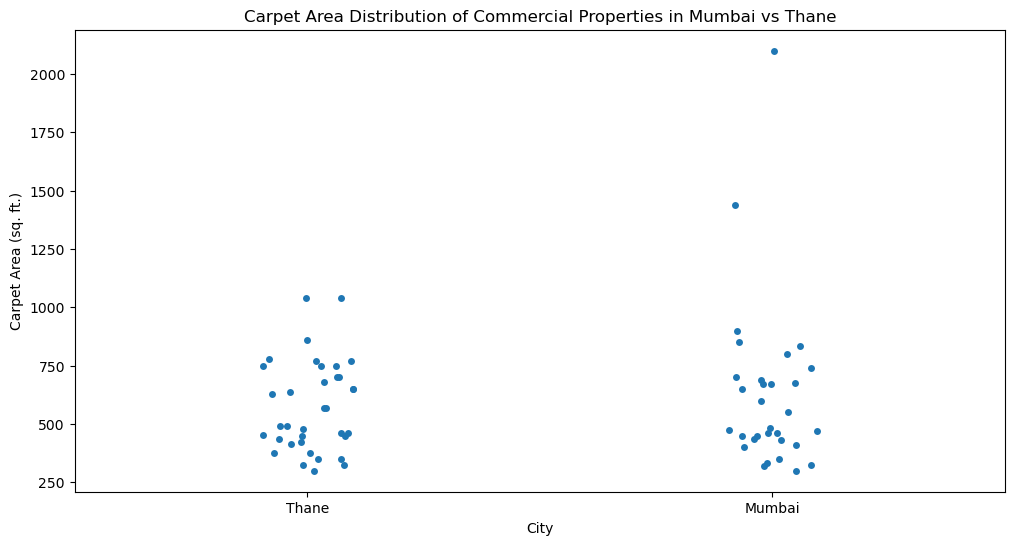

In [24]:
plt.figure(figsize=(12, 6))
sns.stripplot(x='City', y='Price', data=commercial_data, jitter=True)
plt.title('Price Distribution of Commercial Properties in Mumbai vs Thane')
plt.ylabel('Price')
plt.xlabel('City')
plt.show()

plt.figure(figsize=(12, 6))
sns.stripplot(x='City', y='Carpet Area', data=commercial_data, jitter=True)
plt.title('Carpet Area Distribution of Commercial Properties in Mumbai vs Thane')
plt.ylabel('Carpet Area (sq. ft.)')
plt.xlabel('City')
plt.show()


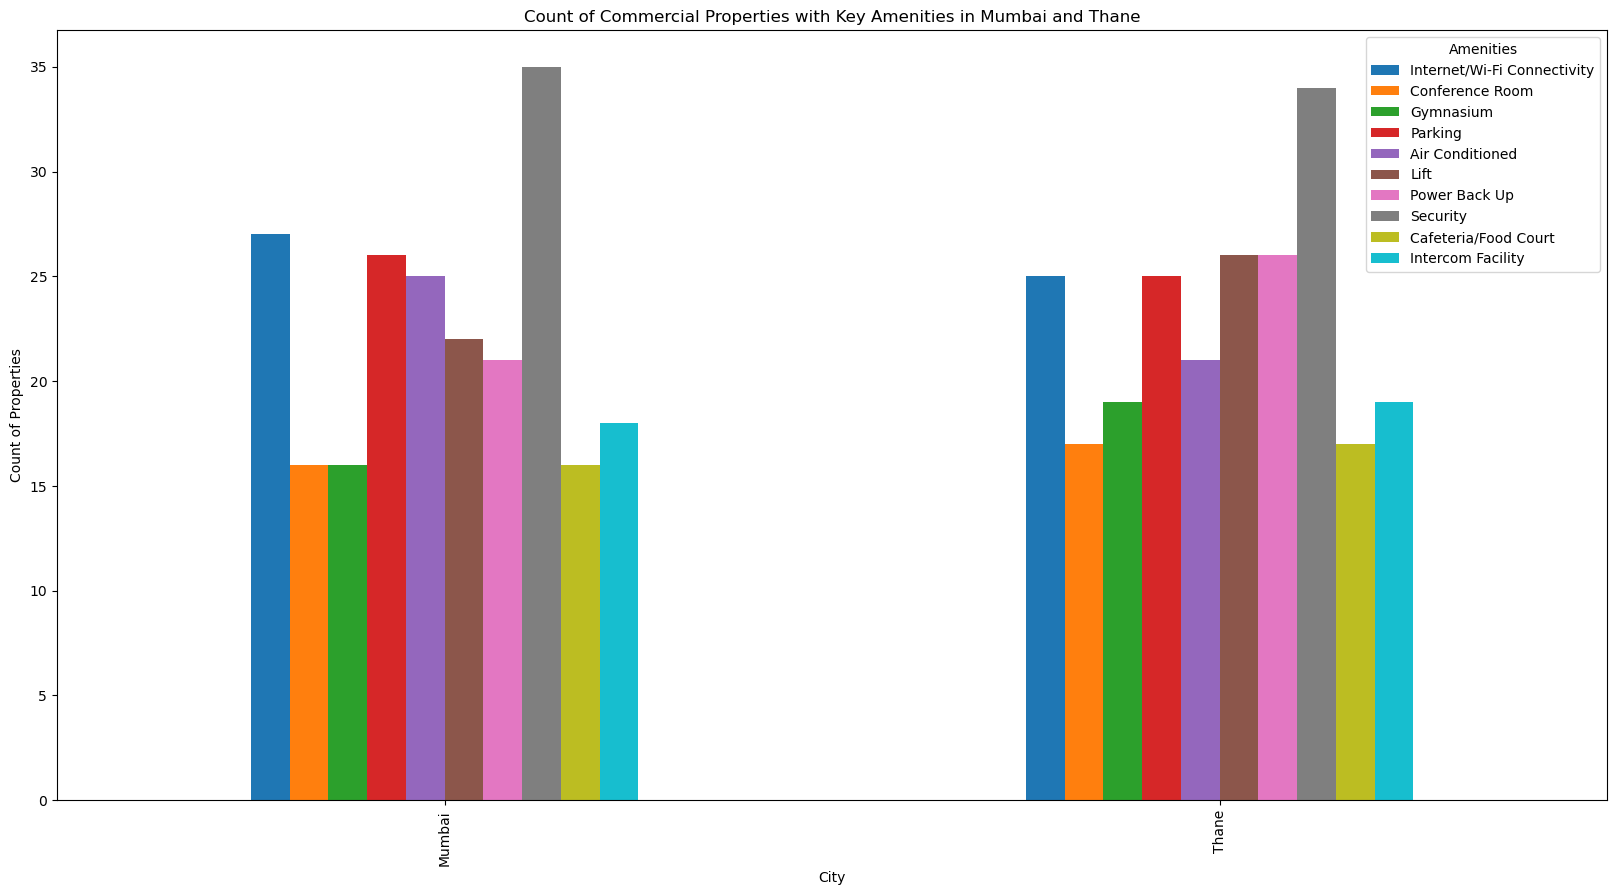

In [48]:
# Calculate the percentage of properties with key amenities for offices in each city
amenities = ['Internet/Wi-Fi Connectivity', 'Conference Room', 'Gymnasium', 'Parking', 'Air Conditioned', 'Lift', 'Power Back Up', 'Security', 'Cafeteria/Food Court', 'Intercom Facility']

amenities_summary = commercial_data.groupby('City')[amenities].sum()
amenities_summary.plot(kind='bar', figsize=(20, 10))
plt.title('Count of Commercial Properties with Key Amenities in Mumbai and Thane')
plt.ylabel('Count of Properties')
plt.xlabel('City')
plt.legend(title='Amenities')
plt.show()





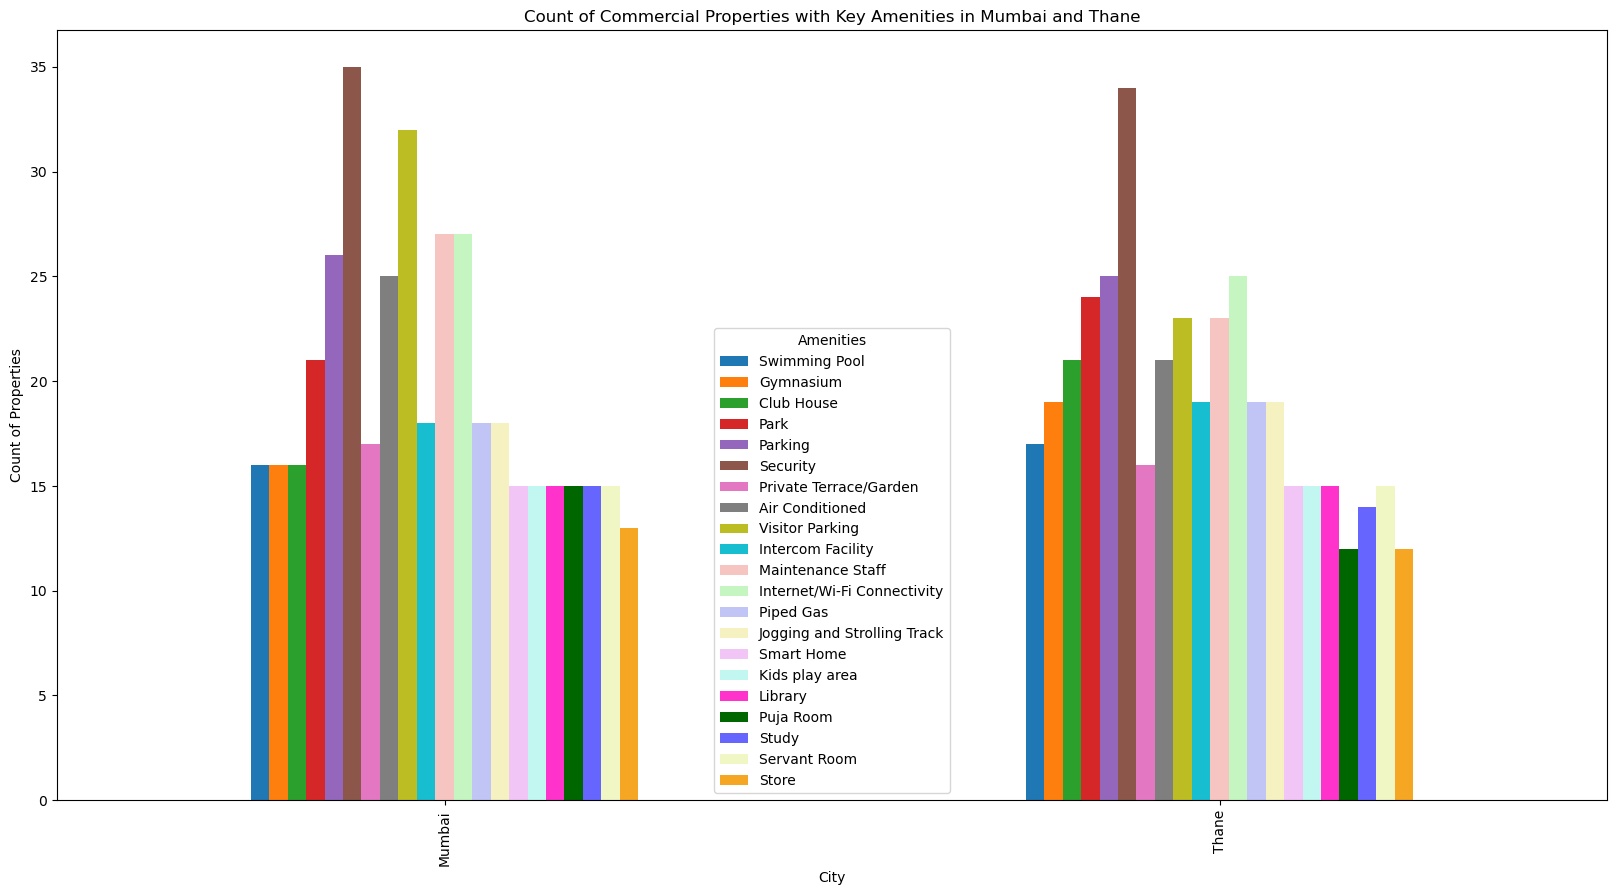

In [66]:
# Some investors want to analyze the impact of various amenities (e.g., Swimming Pool, Gymnasium,
# Club House) on property prices in Mumbai and Thane. Which amenities seem to add the most value?
# Are there differences in amenity preferences between the two cities?
cities = (df['City'].isin(['Mumbai', 'Thane']))

# Calculate the percentage of properties with key amenities for offices in each city
amenities = ['Swimming Pool','Gymnasium','Club House','Park','Parking','Security','Private Terrace/Garden', 'Air Conditioned','Visitor Parking','Intercom Facility','Maintenance Staff','Internet/Wi-Fi Connectivity','Piped Gas','Jogging and Strolling Track','Smart Home','Kids play area','Library','Puja Room','Study','Servant Room','Store']
colors = [
  '#1f77b4',
  '#ff7f0e',
  '#2ca02c',
  '#d62728',
  '#9467bd',
  '#8c564b',
  '#e377c2',
  '#7f7f7f',
  '#bcbd22',
  '#17becf',
  '#f6c5c1',
  '#c5f6c1',
  '#c1c5f6',
  '#f6f1c1',
  '#f1c5f6',
  '#c1f6f1',
  '#ff33cc',
  '#006600',
  '#6666ff',
  '#f1f6c5',
  '#f5a623'
]



# Plotting with unique colors
amenities_summary.plot(kind='bar', figsize=(20, 10), color=colors)
plt.title('Count of Commercial Properties with Key Amenities in Mumbai and Thane')
plt.ylabel('Count of Properties')
plt.xlabel('City')
plt.legend(title='Amenities')
plt.show()

